# [LAB 11] 1.상관분석 개요 - 공분산
- 상관분석은 두 변수가 함께 움직이는 정도를 숫자로 요약해 관계의 방향과 강도를 확인하는 절차
- 데이터 간 연관성을 빠르게 파악할수 있지만 인과관계를 증명하지는 않는다

### #01. 준비작업
#### [1] 패키지 참조

In [3]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

#### [2] 그래프 초기화

In [4]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### [3] 데이터 가져오기

In [5]:
origin = load_data('language_math_scores')
print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print("\n===== 타입확인 =====")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab11_/language_math_scores.xlsx
[desc] 어느 학급의 언어영역과 수리영역 점수를 기록한 가상의 데이터 셋

field     type    description
--------  ------  -------------
언어영역  INT     언어영역 점수
수리영역  INT     수리영역 점수


===== 데이터 크기 확인 =====
데이터셋 크기: (50, 2)
열 개수: 2
행 개수: 50

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   언어영역    50 non-null     int64
 1   수리영역    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,언어영역,수리영역
0,66,66
1,58,70
2,73,74
3,52,58
4,72,79


### #02. 탐색적 데이터 분석
#### (1) 산점도 그래프를 통한 상관정도 확인

| 함수        | 차이                                                                                              |
|-------------|---------------------------------------------------------------------------------------------------|
| scatterplot | `hue` 파라미터 사용 가능, **추세선(trend line) 표시 불가**                                        |
| regplot     | `hue` 파라미터 사용 불가, **추세선 자동 표시(회귀선 포함)**                                       |
| lmplot      | `hue` 파라미터 사용 가능, **추세선 표시 가능**, `plt.figure()` 초기화 안 함, **figure 사이즈 자동 설정** |


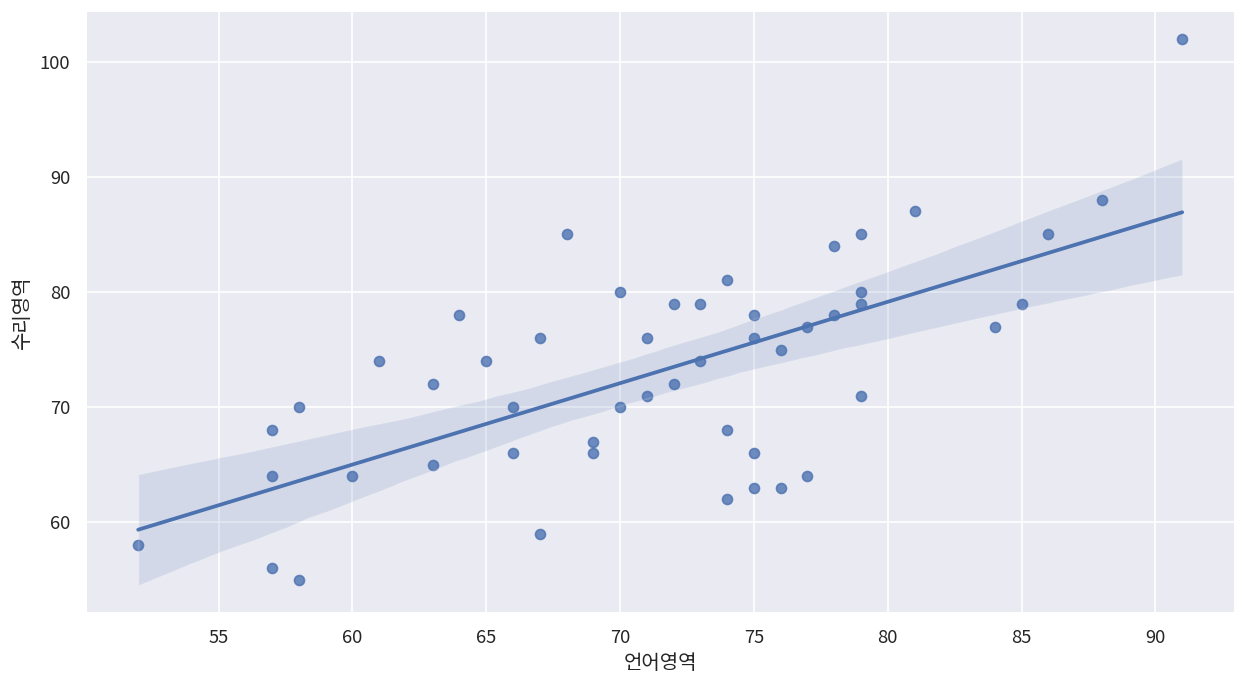

In [ ]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) LM PLOT 그리기
g = sb.lmplot(data = origin, x='언어영역' , y='수리영역')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# 3) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### #03.공분산
- 2개의 확률변수의 상관정도를 나타내는 값
- x 의 편차와 y의 편차를 곱한 것의 평균 (x=y 이면 분산과 같음)

| 구분                        | 방법   |
|-----------------------------|--------|
| 단일 변수의 산포 정도       | 분산   |
| 두 개의 변수 간의 산포 정도 | 공분산 |


파이썬에서는 numpy 패키지의 cov() 를 사용하여 공분산 값을 구할 수 있따
공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나, 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 확인하기에는 한계가 있다

결과값이 양수면 정비례, 음수면 반비례

In [9]:
c = np.cov(origin['언어영역'],origin['수리영역'])
c

array([[76.86693878, 54.39020408],
       [54.39020408, 85.57714286]])

In [10]:
"공분산 : {0}".format(c[0][1])

'공분산 : 54.390204081632646'

### [1] 공분산 해석
#### (1) 부호

| 부호 | 설명                                                      |
|------|-----------------------------------------------------------|
| +    | 두 변수가 같은 방향으로 변화 (하나가 증가하면 다른 하나도 증가) |
| -    | 두 변수가 반대 방향으로 변화 (하나가 증가하면 다른 하나는 감소) |


#### (2) 크기
공분산이 0이더라도 완전히 독립이라고 단정할 수는 없다 (비선형 관계일 수 있음)

공분산의 크기가 클 수록 두 변수는 함꼐 많이 변화하며 단위에 따라 공분산의 크기가 달라지므로 절대적 크기로 판단이 어려움


공분산은 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함



